In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [3]:
data_frame = pd.read_csv('Meteorite_Landings.csv')

In [4]:
data_frame = data_frame.dropna()

In [5]:
data_frame.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [6]:
data_frame.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [7]:
# this_map = folium.Map(prefer_canvas=True)

# def plotDot(point):
#     '''input: series that contains a numeric named latitude and a numeric named longitude
#     this function creates a CircleMarker and adds it to your this_map'''
#     folium.CircleMarker(location=[point.reclat, point.reclong],
#                         radius=3,
#                         fill = True,
#                         color = 'red',
#                         weight=2).add_to(this_map)

# #use df.apply(,axis=1) to "iterate" through every row in your dataframe
# data_frame.apply(plotDot, axis = 1)


# #Set the zoom to the maximum possible
# this_map.fit_bounds(this_map.get_bounds())

# #Save the map to an HTML file
# # this_map.save('simple_dot_plot2.html')

# this_map

In [8]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap # library to plot maps

Text(0.5, 1.0, 'Heatmap of all meteorite impacts')

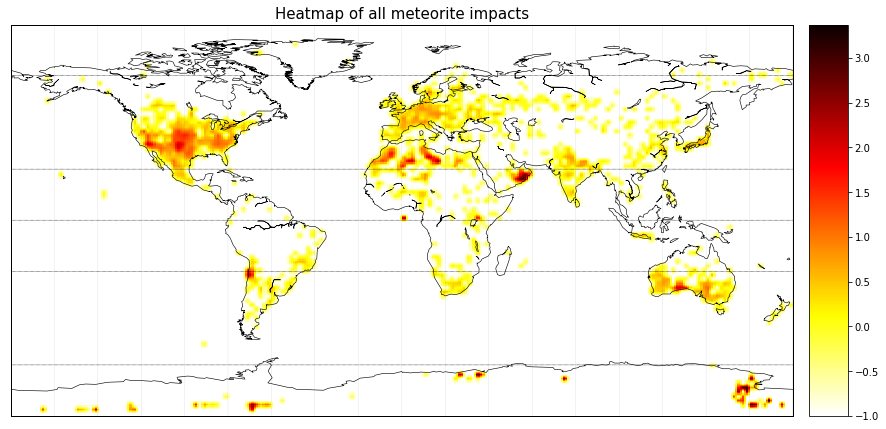

In [9]:
plt.figure(figsize=(15,12))
h = plt.hist2d(data_frame.reclong,data_frame.reclat,bins=(np.arange(-180,182,2),np.arange(-90,92,2)))
X,Y = np.meshgrid(h[1][:-1]+1.0,h[2][:-1]+1.0)

map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.6)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6)

data_interp, x, y = map.transform_scalar(np.log10(h[0].T+0.1), X[0], Y[:,0], 360, 360, returnxy=True)
map.pcolormesh(x, y, data_interp,cmap='hot_r')
map.colorbar()
plt.title('Heatmap of all meteorite impacts', fontsize=15)

In [10]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [11]:
from folium.plugins import HeatMapWithTime
from folium.plugins import MeasureControl
fig7=Figure(width=850,height=550)
m7=folium.Map(location=[50.775000, 6.083330],zoom_start=2)
fig7.add_child(m7)

In [12]:
data_frame = data_frame.sort_values('year')

In [13]:
data_frame = data_frame.astype({'year':int})

In [14]:
data_frame = data_frame.drop_duplicates()

In [15]:
data_frame.shape

(38115, 10)

In [16]:
data_frame

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.18333, 12.73333)"
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490,45.48333,9.51667,"(45.48333, 9.51667)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491,47.86667,7.35000,"(47.86667, 7.35)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575,-27.46667,-60.58333,"(-27.46667, -60.58333)"
174,Castrovillari,5295,Valid,Stone-uncl,15000.0,Fell,1583,39.80000,16.20000,"(39.8, 16.2)"
...,...,...,...,...,...,...,...,...,...,...
30763,Northwest Africa 7822,57268,Valid,Achondrite-ung,45.8,Found,2013,0.00000,0.00000,"(0.0, 0.0)"
30762,Northwest Africa 7812,57258,Valid,Angrite,46.2,Found,2013,0.00000,0.00000,"(0.0, 0.0)"
30775,Northwest Africa 7856,57421,Valid,LL6,517.0,Found,2013,0.00000,0.00000,"(0.0, 0.0)"
30781,Northwest Africa 7863,57427,Valid,LL5,1000.0,Found,2013,0.00000,0.00000,"(0.0, 0.0)"


In [17]:
# data_frame.to_csv('file1.csv')

In [18]:
lat_long_list = []
for i in range(0,len(data_frame)):
    temp=[]
    for index, instance in data_frame[data_frame['year'] == i].iterrows():
        temp.append([instance['reclat'],instance['reclong']])
        lat_long_list.append(temp)

In [19]:
len(lat_long_list)

38115

In [20]:
lat_long_small = lat_long_list[0:2000]

In [21]:
len(lat_long_small)

2000

In [22]:
HeatMapWithTime(lat_long_small,radius=15,auto_play=True,position='bottomright',min_opacity=0.05,max_opacity=1.2,min_speed = 6,speed_step = 7,overlay=True).add_to(m7)
m7